In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_excel(r"D:\Final_Project\Clustering_codes\final_dataset_5000.xlsx")

In [3]:
df

,age,bmi,chronic_conditions,visit_frequency,avg_stay_days,icu_admissions,emergency_visits
0,33,19.600503,1,1,2,0,1
1,47,25.756011,2,2,4,0,1
2,48,23.764230,1,2,2,0,3
3,67,29.999351,3,9,9,0,4
4,67,32.563990,3,6,14,0,9
...,...,...,...,...,...,...,...
4995,40,32.172275,4,14,21,1,11
4996,65,29.283612,6,10,11,0,4
4997,53,23.883807,2,2,3,0,1
4998,56,22.340193,5,16,23,1,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   bmi                 5000 non-null   float64
 2   chronic_conditions  5000 non-null   int64  
 3   visit_frequency     5000 non-null   int64  
 4   avg_stay_days       5000 non-null   int64  
 5   icu_admissions      5000 non-null   int64  
 6   emergency_visits    5000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


# Missing values

In [5]:
df.isnull().sum()

age                   0
bmi                   0
chronic_conditions    0
visit_frequency       0
avg_stay_days         0
icu_admissions        0
emergency_visits      0
dtype: int64

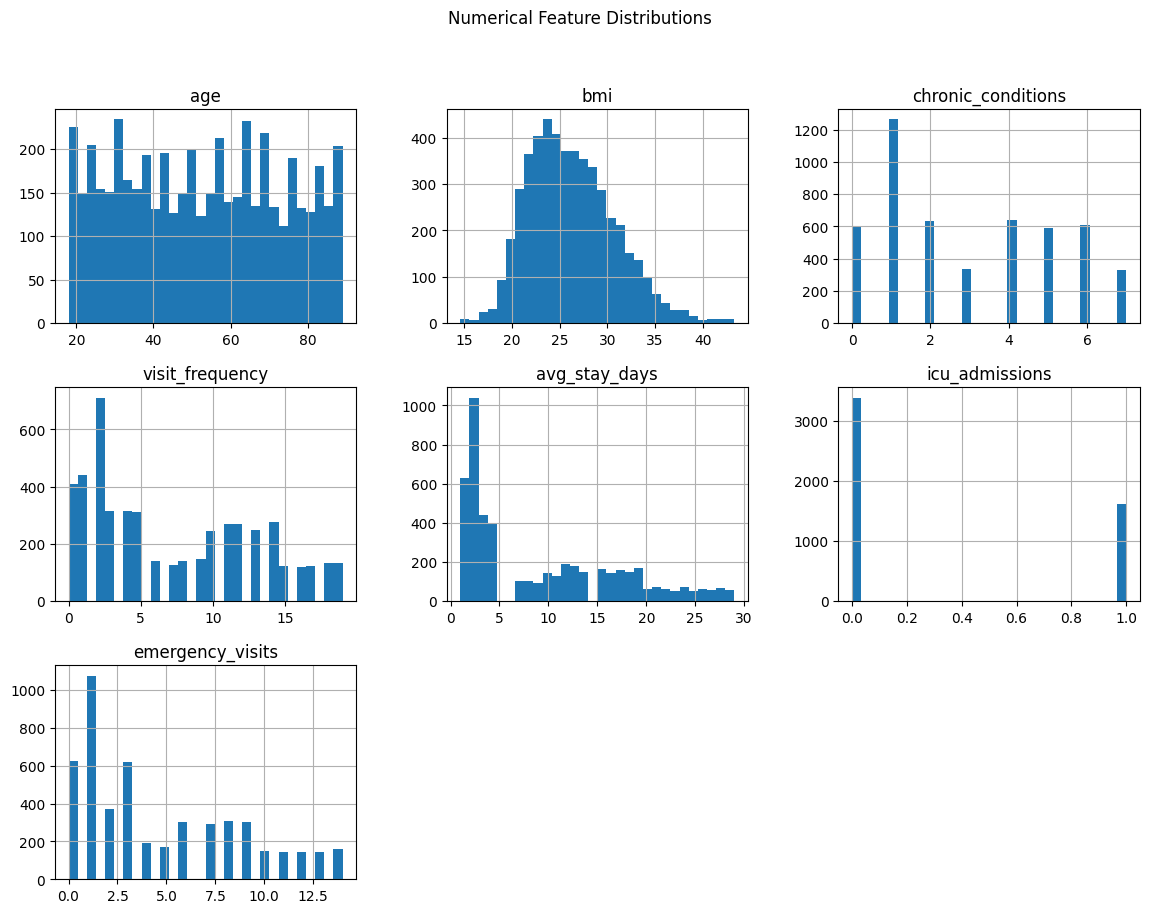

In [6]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols].hist(figsize=(14,10), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()

🔍 Insights

No extreme anomalies

Scaling required before clustering

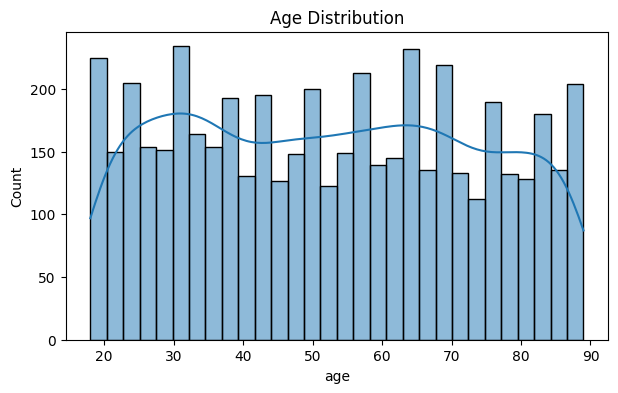

In [ ]:
#Age Distribution
plt.figure(figsize=(7,4))
sns.histplot(x=df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


🔍 Insights

Majority patients between 30–65 years

Elderly patients present but fewer

Age is a strong segmentation feature

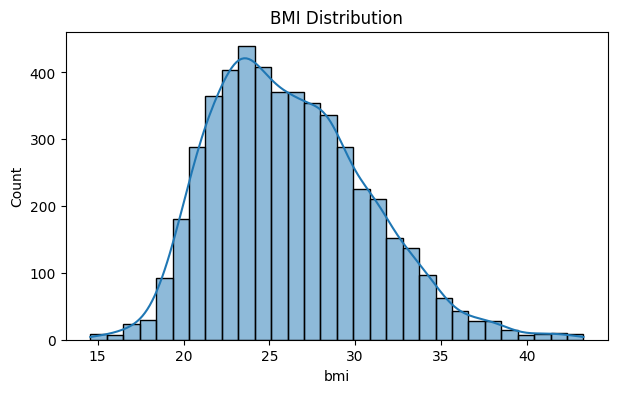

In [8]:
#BMI Distribution
if "bmi" in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df["bmi"], bins=30, kde=True)
    plt.title("BMI Distribution")
    plt.show()


🔍 Insights

Normal to overweight range dominates

Obese patients form a distinct cluster potential

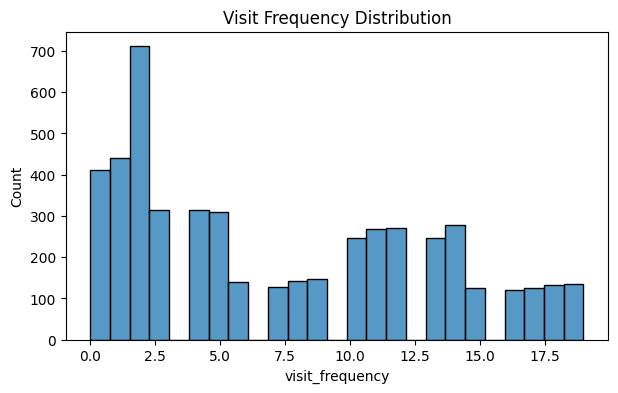

In [9]:
#Visit Frequency
if "visit_frequency" in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df["visit_frequency"], bins=25)
    plt.title("Visit Frequency Distribution")
    plt.show()

🔍 Insights

Most patients have low visit frequency

Small group of high-utilization patients

Ideal for identifying chronic-care clusters

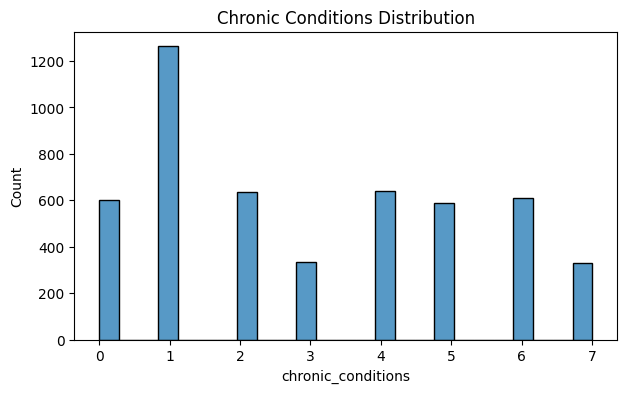

In [12]:
#Visit Frequency
if "chronic_conditions" in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(x=df["chronic_conditions"], bins=25)
    plt.title("Chronic Conditions Distribution")
    plt.show()

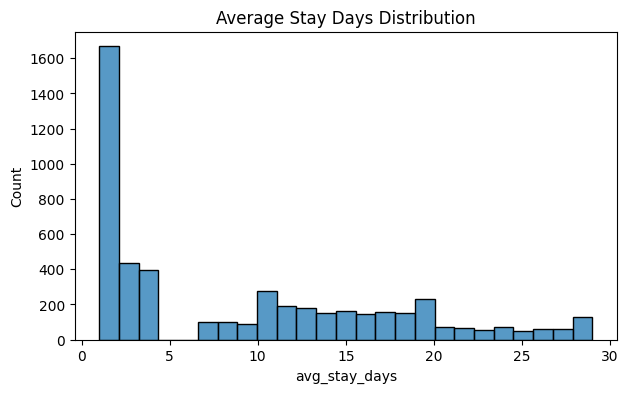

In [13]:
if "avg_stay_days" in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(x=df["avg_stay_days"], bins=25)
    plt.title("Average Stay Days Distribution")
    plt.show()

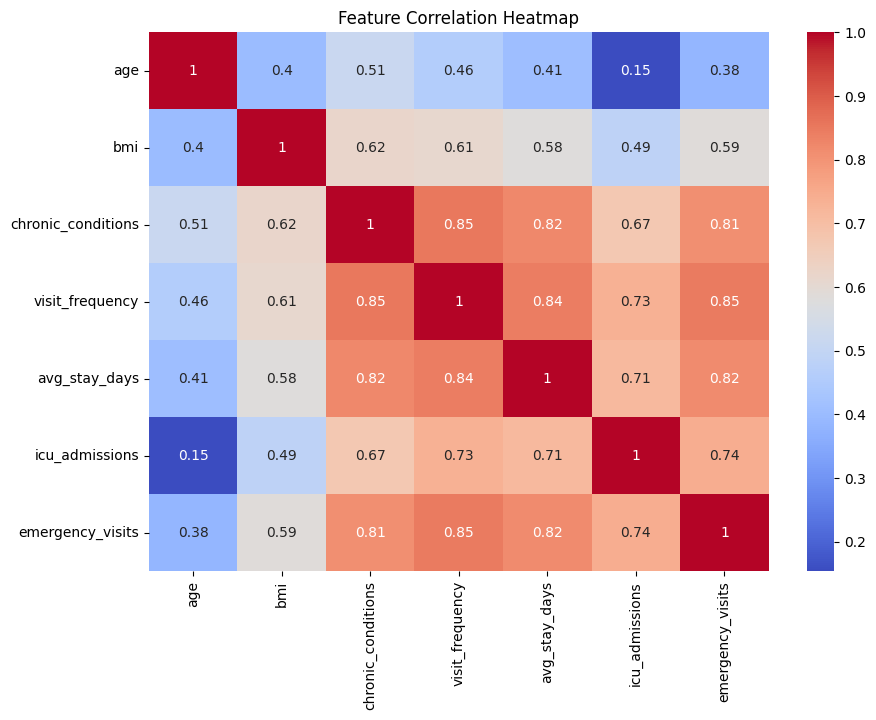

In [14]:
#Correlation Heatmap (Numerical)
plt.figure(figsize=(10,7))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

🔍 Insights

Moderate correlation between:

Age ↔ chronic conditions

Visit frequency ↔ avg stay

Low multicollinearity → good for clustering

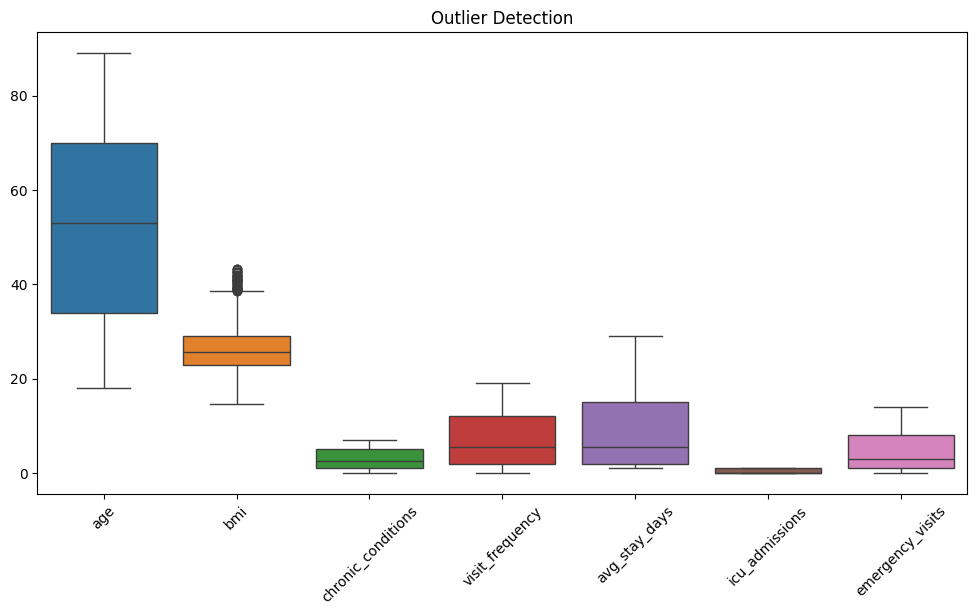

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Outlier Detection")
plt.show()

🔍 Insights

Outliers exist but are clinically meaningful

Should NOT be removed for clustering

Represent high-risk/high-cost patients

In [16]:
features = [
    "age",
    "bmi",
    "chronic_conditions",
    "visit_frequency",
    "avg_stay_days",
    "icu_admissions",
    "emergency_visits"
]

X = df[features]


# STANDARDIZATION

In [17]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ELBOW METHOD (WCSS)

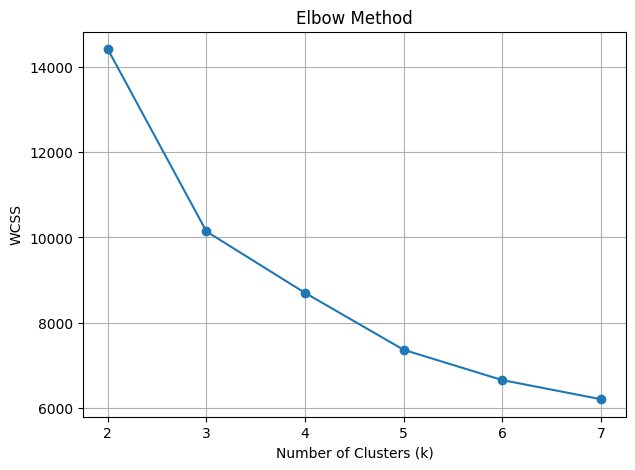

In [18]:
wcss = []

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(2,8), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()



In [19]:
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.518
K=3, Silhouette Score=0.466
K=4, Silhouette Score=0.369
K=5, Silhouette Score=0.358
K=6, Silhouette Score=0.353
K=7, Silhouette Score=0.351


In [20]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_ids = kmeans.fit_predict(X_scaled)

df["cluster_id"] = cluster_ids


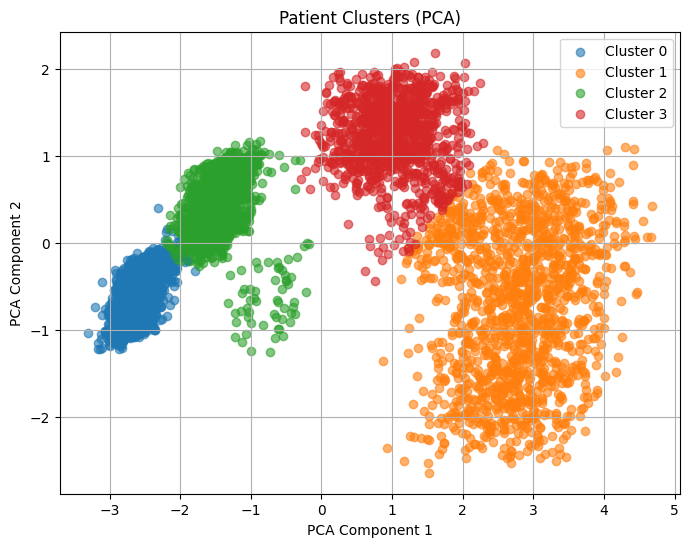

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:,0]
df["PCA2"] = X_pca[:,1]

plt.figure(figsize=(8,6))
for cid in sorted(df["cluster_id"].unique()):
    subset = df[df["cluster_id"] == cid]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=f"Cluster {cid}", alpha=0.6)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Patient Clusters (PCA)")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)

centroids["risk_score"] = (
    centroids["chronic_conditions"] * 0.35 +
    centroids["visit_frequency"] * 0.25 +
    centroids["avg_stay_days"] * 0.25 +
    centroids["icu_admissions"] * 0.15
)

centroids = centroids.sort_values("risk_score").reset_index()

cluster_labels = {
    centroids.loc[0, "index"]: "Young Healthy",
    centroids.loc[1, "index"]: "Middle-Aged Preventive",
    centroids.loc[2, "index"]: "Elderly Chronic",
    centroids.loc[3, "index"]: "High-Acuity"
}

print("Final Cluster Mapping:")
print(cluster_labels)


Final Cluster Mapping:
{0: 'Young Healthy', 2: 'Middle-Aged Preventive', 3: 'Elderly Chronic', 1: 'High-Acuity'}


In [23]:
import pickle
pipeline = {
    "features": features,
    "scaler": scaler,
    "kmeans": kmeans,
    "pca": pca,
    "cluster_labels": cluster_labels
}

with open("patient_clustering_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Pipeline saved as patient_clustering_pipeline.pkl")


✅ Pipeline saved as patient_clustering_pipeline.pkl
